In [52]:
#all imports, other random stuff.

import pandas as pd
import re
import json
import requests
import datetime
import matplotlib.pyplot as plt

currency_exchange_key = '6d6ad000bc53f42da99e76b97796bb3b'
sheet_id = '1ew6-o4BsJZTTWUhgavg_hfzPk4Ncx9RmossQTrezzvQ'
gid = '817198571'
colsPerData = 5

In [4]:
#--------------------------------------Currency exchange rates ------------------------------------------
exchange_url = f"http://api.exchangeratesapi.io/v1/latest?access_key={currency_exchange_key}"
response = requests.get(exchange_url)
json_data = json.loads(response.text)
print('EUR TO USD:')
json_data['rates']['USD']

EUR TO USD:


1.193882

In [5]:
i = 0
df1 = pd.read_csv(f"https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv&gid={gid}", 
                  skiprows=8,
                  usecols = range(i,i+colsPerData),
                  names = ['Advertiser','Placement','Date', 'Total Impressions', 'Revenue(EUR)'] 
                 )
i = i + colsPerData
bpcom = pd.read_csv(f"https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv&gid={gid}", 
                  skiprows=8,
                  usecols = range(i,i+colsPerData),
                  names = ['Date','Advertiser','Key-Values ID', 'Total Impressions', 'Revenue(EUR)']
                 )
i = i + colsPerData
bpes = pd.read_csv(f"https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv&gid={gid}", 
                  skiprows=8,
                  usecols = range(i,i+colsPerData),
                  names = ['Date','Advertiser','Key-Values ID', 'Total Impressions', 'Revenue(EUR)'])
i = i + colsPerData
de = pd.read_csv(f"https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv&gid={gid}", 
                  skiprows=8,
                  usecols = range(i,i+colsPerData),
                  names = ['Date','Advertiser','Key-Values ID', 'Total Impressions', 'Revenue(EUR)'])

In [6]:
df1.head()
#bpcom.head()
#bpes.head()
#de.head()

,Advertiser,Placement,Date,Total Impressions,Revenue(EUR)
0,Ad Exchange,MM_BPCOM_HBS_Placement,11/1/2020,"5,738,966","€4,997.98"
1,Ad Exchange,MM_BPCOM_HBS_Placement,11/2/2020,"6,284,253","€4,778.92"
2,Ad Exchange,MM_BPCOM_HBS_Placement,11/3/2020,"8,756,438","€5,889.84"
3,Ad Exchange,MM_BPCOM_HBS_Placement,11/4/2020,"6,779,636","€5,030.56"
4,Ad Exchange,MM_BPCOM_HBS_Placement,11/5/2020,"6,932,687","€5,214.96"


In [47]:
#cleaning data from unknown characters, changing dates to DateTimes.
#df1['Revenue'] = df1['Revenue'].str.replace('[\,\€,\$]', '').astype(float)
df1['Revenue(EUR)'] = df1['Revenue(EUR)'].replace('[\,\€,\$,a-zA-Z]', '', regex=True).astype(float)
df1['Total Impressions'] = df1['Total Impressions'].replace('\W', '', regex=True).astype(int)
df1['Date'] = pd.to_datetime(df1['Date'])

bpcom['Revenue(EUR)'] = bpcom['Revenue(EUR)'].replace('[\,\€,\$]', '', regex=True).astype(float)
bpcom['Total Impressions'] = bpcom['Total Impressions'].replace('[\W,a-zA-Z]', '', regex=True).astype(int)
bpcom['Date'] = pd.to_datetime(bpcom['Date'])

bpes['Revenue(EUR)'] = bpes['Revenue(EUR)'].replace('[\,\€,\$]', '', regex=True).astype(float)
bpes['Total Impressions'] = bpes['Total Impressions'].replace('[\W,a-zA-Z]', '', regex=True).astype(int)
bpes['Date'] = pd.to_datetime(bpes['Date'])

de['Revenue(EUR)'] = de['Revenue(EUR)'].replace('[\,\€,\$]', '', regex=True).astype(float)
de['Revenue(EUR)'] = de['Revenue(EUR)']/json_data['rates']['USD']
de['Total Impressions'] = de['Total Impressions'].replace('[\W,a-zA-Z]', '', regex=True).astype(int)
de['Date'] = pd.to_datetime(de['Date'])

In [48]:
df1.head()
#bpcom.head()
#bpes.head()
#de.head()

,Advertiser,Placement,Date,Total Impressions,Revenue(EUR)
0,Ad Exchange,MM_BPCOM_HBS_Placement,2020-11-01,5738966,4997.98
1,Ad Exchange,MM_BPCOM_HBS_Placement,2020-11-02,6284253,4778.92
2,Ad Exchange,MM_BPCOM_HBS_Placement,2020-11-03,8756438,5889.84
3,Ad Exchange,MM_BPCOM_HBS_Placement,2020-11-04,6779636,5030.56
4,Ad Exchange,MM_BPCOM_HBS_Placement,2020-11-05,6932687,5214.96


In [19]:
latest_date = datetime.datetime(1997,6,12)
earliest_date = datetime.datetime(2097,6,12)
dates = []

for index, row in df1.iterrows():
    if (row['Date'] > latest_date):
        latest_date = row['Date']
    if (row['Date'] < earliest_date):
        earliest_date = row['Date']
        
for i in range(0, (latest_date-earliest_date).days + 1):
    dates.append(earliest_date + datetime.timedelta(days=i))
        
print((latest_date-earliest_date).days)
print(latest_date)
print(earliest_date)

21
2020-11-22 00:00:00
2020-11-01 00:00:00


In [51]:
#calculating revenues/impressions for final dataframe
total_revenue = []
total_impressions = []
bpcom_revenue = []
bpcom_impressions = []
bpes_revenue = []
bpes_impressions = []
de_revenue = []
de_impressions = []


for i in range(0, (latest_date-earliest_date).days + 1):
    revenue_total = df1[df1['Date'] == earliest_date + datetime.timedelta(days=i)]['Revenue(EUR)'].sum()
    total_revenue.append(revenue_total)
    
    impressions_total = df1[df1['Date'] == earliest_date + datetime.timedelta(days=i)]['Total Impressions'].sum()
    total_impressions.append(impressions_total)
    
    revenue_bpcom = bpcom[bpcom['Date'] == earliest_date + datetime.timedelta(days=i)]['Revenue(EUR)'].sum()
    bpcom_revenue.append(revenue_bpcom)
    
    impressions_bpcom = bpcom[bpcom['Date'] == earliest_date + datetime.timedelta(days=i)]['Total Impressions'].sum()
    bpcom_impressions.append(impressions_bpcom)
    
    revenue_bpes = bpes[bpes['Date'] == earliest_date + datetime.timedelta(days=i)]['Revenue(EUR)'].sum()
    bpes_revenue.append(revenue_bpes)
    
    impressions_bpes = bpes[bpes['Date'] == earliest_date + datetime.timedelta(days=i)]['Total Impressions'].sum()
    bpes_impressions.append(impressions_bpes)
    
    revenue_de = de[de['Date'] == earliest_date + datetime.timedelta(days=i)]['Revenue(EUR)'].sum()
    de_revenue.append(revenue_de)
    
    impressions_de = de[de['Date'] == earliest_date + datetime.timedelta(days=i)]['Total Impressions'].sum()
    de_impressions.append(impressions_de)
    

In [50]:
#creating summary table dataframe

data = {'Date':dates, 
        'BP ALL Revenue(EUR)':total_revenue, 
        'BPCOM Revenue (EUR)':bpcom_revenue, 
        'BPES Revenue(EUR)': bpes_revenue,
        'DE Revenue(EUR)': de_revenue,
        'BP ALL Impressions': total_impressions,
        'BPCOM Impressions': bpcom_impressions,
        'BPES Impressions': bpes_impressions,
        'DE Impressions': de_impressions}
df = pd.DataFrame(data)
df

,Date,BP ALL Revenue(EUR),BPCOM Revenue (EUR),BPES Revenue(EUR),DE Revenue(EUR),BP ALL Impressions,BPCOM Impressions,BPES Impressions,DE Impressions
0,2020-11-01,6111.30,2971.32,18.04,9.672653,7265099,1776524,32313,16377
1,2020-11-02,5875.70,2881.10,8.54,8.191785,7819255,1922541,15994,13043
2,2020-11-03,7301.02,3672.22,10.36,7.604139,10762132,2594381,15643,13962
3,2020-11-04,6161.04,2463.58,15.42,6.746176,8396766,1773910,24661,12694
4,2020-11-05,6476.58,2998.04,29.68,11.870449,8761913,1938340,52860,20466
5,2020-11-06,6740.66,3056.06,34.80,13.269047,8570709,1968489,55492,18365
6,2020-11-07,6078.14,2655.54,25.70,13.457093,7449989,1693699,39053,14720
7,2020-11-08,4887.98,1991.14,15.48,6.123271,6063885,1264236,22848,8449
8,2020-11-09,5181.74,2074.54,12.90,7.028246,6909036,1414791,17971,8049
9,2020-11-10,5485.40,2305.58,19.76,5.935225,7319770,1546208,27153,7874


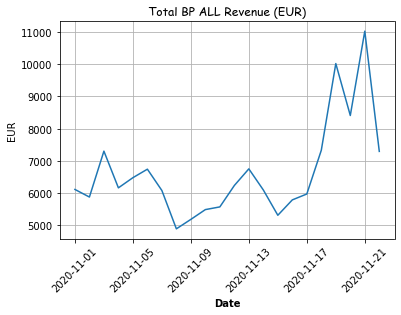

In [71]:
plt.plot(df['Date'],df['BP ALL Revenue(EUR)'])
plt.title('Total BP ALL Revenue (EUR)', {'fontname':'Comic Sans MS'})
plt.xlabel('Date', {'weight':'bold'})
plt.ylabel('EUR')
plt.xticks(rotation=45)
plt.grid(b='on')
plt.savefig('all_revenue_bp_all.png')

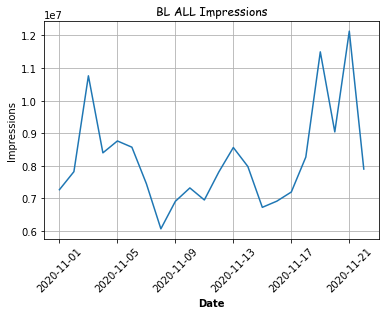

In [69]:
plt.plot(df['Date'],df['BP ALL Impressions'])
plt.title('BL ALL Impressions', {'fontname':'Comic Sans MS'})
plt.xlabel('Date', {'weight':'bold'})
plt.ylabel('Impressions')
plt.xticks(rotation=45)
plt.grid(b='on')
plt.savefig('all_impressions_bp_all.png')